# Data prep
---

## AChE, MAO-A - regression

In [27]:
from src.utils import clean_smiles
from pathlib import Path
import pandas as pd
import numpy as np

PATH = Path('data/admet_transfer/MAO-A/rat/property_ic50/DOWNLOAD-pGaeJFmXDZKURAR86juYmLsM0VahswpWeHZ2TMJo5qk_eq_.csv')
df = pd.read_csv(PATH, sep=';')
df

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value
0,CHEMBL328446,NaN,NaN,146.19,0.0,1.00,1,C#CCN(N)c1ccccc1,IC50,'=',...,CHEMBL1133809,1,Scientific Literature,Bioorg Med Chem Lett,2001,NaN,NaN,NaN,NaN,11.300000
1,CHEMBL66723,NaN,NaN,258.30,0.0,3.27,4f,C=Cc1cccc2c1S(=O)(=O)c1ccccc1O2,IC50,'=',...,CHEMBL1125219,1,Scientific Literature,J Med Chem,1991,NaN,NaN,NaN,NaN,0.040000
2,CHEMBL541126,NaN,NaN,310.27,0.0,2.53,4i,Cl.Cl.NCc1ccncc1NCC1CCCCC1.O,IC50,'=',...,CHEMBL1141879,1,Scientific Literature,J Med Chem,2005,NaN,NaN,NaN,NaN,0.000095
3,CHEMBL303245,NaN,NaN,276.31,0.0,2.68,4b,CC(O)c1cccc2c1S(=O)(=O)c1ccccc1O2,IC50,'=',...,CHEMBL1125219,1,Scientific Literature,J Med Chem,1991,NaN,NaN,NaN,NaN,0.400000
4,CHEMBL63423,NaN,NaN,225.25,0.0,3.54,12,CC(=O)Nc1ccc2c(c1)oc1ccccc12,IC50,'=',...,CHEMBL1127802,1,Scientific Literature,J Med Chem,1994,NaN,NaN,NaN,NaN,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,CHEMBL86304,MOCLOBEMIDE,4.0,268.74,0.0,1.40,MOC,O=C(NCCN1CCOCC1)c1ccc(Cl)cc1,IC50,'=',...,CHEMBL2321669,1,Scientific Literature,J Med Chem,2013,NaN,NaN,NaN,NaN,10000.000000
1224,CHEMBL5171345,NaN,NaN,199.30,0.0,2.11,(+/-)2-MPAT,C#CCN(C)C1CCc2ccccc2C1,IC50,'=',...,CHEMBL5143673,1,Scientific Literature,Bioorg Med Chem Lett,2022,NaN,NaN,INHIBITOR,NaN,0.046000
1225,CHEMBL9352,NARINGENIN,NaN,272.26,0.0,2.51,218,O=C1C[C@@H](c2ccc(O)cc2)Oc2cc(O)cc(O)c21,IC50,'=',...,CHEMBL5244208,1,Scientific Literature,Eur J Med Chem,2018,NaN,NaN,INHIBITOR,NaN,342.000000
1226,CHEMBL5174396,NaN,NaN,345.35,0.0,2.99,6m,O=C1OC(Cc2ccc(F)c(F)c2)c2ccc(N3CC[C@@H](O)C3)cc21,IC50,'=',...,CHEMBL5143679,1,Scientific Literature,Bioorg Med Chem Lett,2022,NaN,NaN,INHIBITOR,NaN,1.800000


In [28]:
print(len(df))
df = df[df['Standard Units'] == 'nM']
df = df[df['Standard Relation'] == "'='"]
print(len(df))
df

1228
988


,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value
0,CHEMBL328446,NaN,NaN,146.19,0.0,1.00,1,C#CCN(N)c1ccccc1,IC50,'=',...,CHEMBL1133809,1,Scientific Literature,Bioorg Med Chem Lett,2001,NaN,NaN,NaN,NaN,11.300000
1,CHEMBL66723,NaN,NaN,258.30,0.0,3.27,4f,C=Cc1cccc2c1S(=O)(=O)c1ccccc1O2,IC50,'=',...,CHEMBL1125219,1,Scientific Literature,J Med Chem,1991,NaN,NaN,NaN,NaN,0.040000
2,CHEMBL541126,NaN,NaN,310.27,0.0,2.53,4i,Cl.Cl.NCc1ccncc1NCC1CCCCC1.O,IC50,'=',...,CHEMBL1141879,1,Scientific Literature,J Med Chem,2005,NaN,NaN,NaN,NaN,0.000095
3,CHEMBL303245,NaN,NaN,276.31,0.0,2.68,4b,CC(O)c1cccc2c1S(=O)(=O)c1ccccc1O2,IC50,'=',...,CHEMBL1125219,1,Scientific Literature,J Med Chem,1991,NaN,NaN,NaN,NaN,0.400000
4,CHEMBL63423,NaN,NaN,225.25,0.0,3.54,12,CC(=O)Nc1ccc2c(c1)oc1ccccc12,IC50,'=',...,CHEMBL1127802,1,Scientific Literature,J Med Chem,1994,NaN,NaN,NaN,NaN,0.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1223,CHEMBL86304,MOCLOBEMIDE,4.0,268.74,0.0,1.40,MOC,O=C(NCCN1CCOCC1)c1ccc(Cl)cc1,IC50,'=',...,CHEMBL2321669,1,Scientific Literature,J Med Chem,2013,NaN,NaN,NaN,NaN,10000.000000
1224,CHEMBL5171345,NaN,NaN,199.30,0.0,2.11,(+/-)2-MPAT,C#CCN(C)C1CCc2ccccc2C1,IC50,'=',...,CHEMBL5143673,1,Scientific Literature,Bioorg Med Chem Lett,2022,NaN,NaN,INHIBITOR,NaN,0.046000
1225,CHEMBL9352,NARINGENIN,NaN,272.26,0.0,2.51,218,O=C1C[C@@H](c2ccc(O)cc2)Oc2cc(O)cc(O)c21,IC50,'=',...,CHEMBL5244208,1,Scientific Literature,Eur J Med Chem,2018,NaN,NaN,INHIBITOR,NaN,342.000000
1226,CHEMBL5174396,NaN,NaN,345.35,0.0,2.99,6m,O=C1OC(Cc2ccc(F)c(F)c2)c2ccc(N3CC[C@@H](O)C3)cc21,IC50,'=',...,CHEMBL5143679,1,Scientific Literature,Bioorg Med Chem Lett,2022,NaN,NaN,INHIBITOR,NaN,1.800000


In [29]:
df_ = df[['Smiles', 'Standard Value']].dropna().copy()
df_['Smiles'] = clean_smiles(df_['Smiles'])
df_ = df_.drop_duplicates(subset=['Smiles'])

print(len(df_))

df_ = df_.rename(columns={'Standard Value': 'IC50 (nM)'})
df_ = df_[df_['IC50 (nM)'] > 0]
df_['pIC50'] = -df_['IC50 (nM)'].apply(lambda x: np.log10(x * 1e-9))
df_['y'] = df_['pIC50']

print(len(df_))

877
876


In [30]:
df_.to_csv(PATH.parent / 'maoa_human_cleaned.csv', index=False)

## Liver T1/2 - regression

In [62]:
PATH1 = Path('data/admet_transfer/liver/rat_liver/property_T1.2/DOWNLOAD-U3s1LO542aSgGMcS9uc2G38-UMz1FIlZL_ptLVDBaUA_eq_.csv')
PATH2 = Path('data/admet_transfer/liver/rat_liver/property_T1.2/DOWNLOAD-UWN-ICI0Cnm2tn2RZCmzlAKx0Zcd_7pS6Ui6ZC8tNr4_eq_.csv')
df1 = pd.read_csv(PATH1, sep=';')
df2 = pd.read_csv(PATH2, sep=';')
df = pd.concat([df1, df2], ignore_index=True)

In [63]:
print(len(df))
df = df[df['Standard Units'] == 'hr']
df = df[df['Standard Relation'] == "'='"]
print(len(df))
df

2322
1770


,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value
0,CHEMBL3235767,NaN,NaN,382.69,0.0,3.19,11a,Br.Cn1c(=N)n(CCOc2ccc(Cl)cc2)c2ccccc21,T1/2,'=',...,CHEMBL3232983,1,Scientific Literature,Eur J Med Chem,2014,NaN,NaN,NaN,NaN,13.50
1,CHEMBL3187106,NaN,NaN,392.51,1.0,6.00,71,Cc1cnc(-c2ccccc2C2CC2)nc1NCc1ccc(-c2cccnc2)cc1,T1/2,'=',...,CHEMBL3352044,1,Scientific Literature,J Med Chem,2014,NaN,NaN,NaN,NaN,6.20
2,CHEMBL3410047,NaN,NaN,417.47,0.0,3.97,18m,COc1cccc(N(CCO)C(=O)Nc2ccc(-c3ncnc4[nH]cc(C)c3...,T1/2,'=',...,CHEMBL3407489,1,Scientific Literature,J Med Chem,2015,NaN,NaN,NaN,NaN,21.00
4,CHEMBL3398173,NaN,NaN,502.58,1.0,2.79,19,COc1cc([C@@H]2CCN(CC(N)=O)C[C@@H]2O)ccc1Nc1ncc...,T1/2,'=',...,CHEMBL3396997,1,Scientific Literature,Bioorg Med Chem Lett,2015,NaN,NaN,NaN,NaN,34.00
5,CHEMBL3100056,NaN,NaN,449.30,0.0,4.82,1r,COc1ccc(C2=NO[C@@]3(C(=O)Nc4cc(Br)ccc43)[C@@H]...,T1/2,'=',...,CHEMBL3098112,1,Scientific Literature,Bioorg Med Chem,2014,NaN,NaN,NaN,NaN,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,CHEMBL1394231,NaN,NaN,455.59,0.0,4.41,1,CCc1ccc(S(=O)(=O)c2nnn3c2nc(NCc2cccs2)c2sccc23...,T1/2,'=',...,CHEMBL2163305,1,Scientific Literature,J Med Chem,2012,NaN,NaN,NaN,NaN,2.80
2317,CHEMBL2324589,NaN,NaN,333.80,0.0,3.55,20,CC(C)(C)n1nc(Cc2ccc(F)c(Cl)c2)c2c(N)ncnc21,T1/2,'=',...,CHEMBL2321856,1,Scientific Literature,J Med Chem,2013,NaN,NaN,NaN,NaN,4.00
2318,CHEMBL195217,NaN,NaN,236.27,0.0,3.92,5,Oc1cccc(-c2ccc3cc(O)ccc3c2)c1,T1/2,'=',...,CHEMBL1142381,1,Scientific Literature,J Med Chem,2008,NaN,NaN,NaN,NaN,12.60
2319,CHEMBL1084107,NaN,NaN,355.83,0.0,3.42,23,CN(C)C(C(=O)Nc1cc2cc[nH]c(=O)c2cc1Cl)c1ccccc1,T1/2,'=',...,CHEMBL1155525,1,Scientific Literature,Bioorg Med Chem Lett,2010,NaN,NaN,NaN,NaN,3.00


3134


<Axes: >

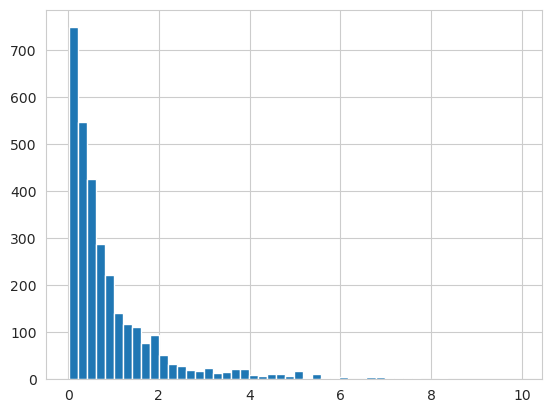

In [59]:
# drop rows for which Standard Value > 10h
df = df[df['Standard Value'] > 0]
df = df[df['Standard Value'] <= 10]
print(len(df))
df['Standard Value'].hist(bins=50)

In [60]:
df_ = df[['Smiles', 'Standard Value']].dropna().copy()
df_['Smiles'] = clean_smiles(df_['Smiles'])
df_ = df_.drop_duplicates(subset=['Smiles'])

print(len(df_))

df_ = df_.rename(columns={'Standard Value': 't1/2 (h)'})
df_['pt1/2'] = -df_['t1/2 (h)'].apply(lambda x: np.log10(x))
df_['y'] = df_['pt1/2']

print(len(df_))

2987
2987


In [61]:
df_.to_csv(PATH1.parent / 'liver_t12_human_cleaned.csv', index=False)